In [35]:
from sklearn import linear_model
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import datasets ## imports datasets from scikit-learn
df_raw = pd.read_csv("C:/Users/Divya Mereddy/OneDrive - United Installs, LLC/Python Scripts/DataSets/Data Export Daily Install_WO_edited.csv",index_col=0)
df = pd.read_csv("C:/Users/Divya Mereddy/Documents/Python Scripts/Data.csv",index_col=0)
type(df)

pandas.core.frame.DataFrame

In [36]:
df=df_raw[df_raw['Pad Type']=='Super 6 lb']


In [37]:
df=df[['PO#','Pad Type','Rolls','Linear Feet','Store #','Current Status']]

In [38]:
df.head()

,PO#,Pad Type,Rolls,Linear Feet,Store #,Current Status
Customer Name,,,,,,
Adam & sara Henegar,57857473,Super 6 lb,3.0,35.00,0554 - Lowe's of Florence,Complete and Billed
ADAM REUSCH,44903025,Super 6 lb,2.0,18.67,0554 - Lowe's of Florence,Complete and Billed
Adolf Allesch,52299559,Super 6 lb,2.0,42.00,0554 - Lowe's of Florence,Complete and Billed
Adolf Allesch,52299618,Super 6 lb,3.0,33.00,0554 - Lowe's of Florence,Complete and Billed
AL FEDERMAN,44430919,Super 6 lb,2.0,18.67,1071 - Lowe's of Highland Heights,Complete and Billed


In [39]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Rolls,214.0,1.953271,0.958120,0.0,2.0,2.00,2.0,7.0
Linear Feet,214.0,20.498131,11.124919,0.0,18.0,18.67,27.0,44.0


In [40]:
Olddata=['']

In [41]:
#measurement chnages 
df['Pad_Requirement_Count']=df['Rolls']*45+df['Linear Feet']

In [42]:
CancelledPadState=['Project Cancelled','Cancelled by CPO/ISO','Project Canceled - Duplicate']

In [43]:
PadnotRequiredState=['Verification - Exceptions Found',
'Install Complete - Survey Required',
'Project Incomplete',
'Dispatched',
'Install Complete - Follow up Complete',
'In Progress Call',
'Project Completed Survey ASAP',
'Install Complete - Ready to Bill',
'Refund and Rebill Complete',
'Project Complete Left Message To Survey',
'Project Complete -  Accounting To Review',
'Project Complete - Waiting on COC',
'Project Complete - CoC Submitted',
'Project Complete - Accounting Final Review',
'Project Complete -  Waiting on RR',
'Project Complete - Paperwork Submitted',
'Complete and Billed',
'Completed and Invoiced',
'Install In Progress - Waiting on Addl PO',
'Project Complete - Non Billable',
'Install Complete - Payroll to Verify',
'Invoiced Waiting on CoC',

]

In [44]:
#ReceivedState=['Received Express P.O.','Received P.O.']
PadRequiredState=['Express Sent To Scheduling','Left Message','Left ‘nd Message','Left 3rd Message','Sent To Installer To Schedule',
'Unable to leave message - Voicemail full',
'Attempted To Contact','Customer not ready to schedule','Customer no show',
'Verification - Awaiting Product Check'
,'Install Scheduled'
,'Verification Complete - Ready To Schedule'
,'Received P.O.'
,'Received Express P.O.'
,'Verification Complete - Waiting on SOS'
,'SOS Product Received - Ready To Schedule’'
,'Left ‘nd Message'
,'Left 3rd Message'
,'Customer Unreachable - Please Provide an Alternate Phone Number'
,'Per CPO -  Product Received Verification Needed'
,'Voicemail Not Set Up - Unable to Leave Message']


#if we are reserving the pad and have a functionality for that then we can fetch status from that

In [45]:
CancelledData=['Project Cancelled','Cancelled by CPO/ISO','Project Canceled - Duplicate']

In [46]:
df['Current Status'][df['Current Status'].isin(PadRequiredState)]=1
df['Current Status'][df['Current Status'].isin(CancelledPadState)]=-1
df['Current Status'][df['Current Status'].isin(PadnotRequiredState)]=0

C:\Users\Divya Mereddy\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Divya Mereddy\Anaconda31\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Divya Mereddy\Anaconda31\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [47]:
#df_raw['Current Status'][df_raw['Current Status'].isin([0,1,-1])==0]
print(df['Current Status'].describe())
df_ramdomdata=df['Current Status'][~df['Current Status'].isin([0,1,-1])]
df_ramdomdata.describe()

count     214
unique      3
top         0
freq      209
Name: Current Status, dtype: int64


count     0
unique    0
Name: Current Status, dtype: int64

In [48]:
df[df['Current Status'].isin([0,1,2])].head()

,PO#,Pad Type,Rolls,Linear Feet,Store #,Current Status,Pad_Requirement_Count
Customer Name,,,,,,,
Adam & sara Henegar,57857473,Super 6 lb,3.0,35.00,0554 - Lowe's of Florence,0,170.00
ADAM REUSCH,44903025,Super 6 lb,2.0,18.67,0554 - Lowe's of Florence,0,108.67
Adolf Allesch,52299559,Super 6 lb,2.0,42.00,0554 - Lowe's of Florence,0,132.00
Adolf Allesch,52299618,Super 6 lb,3.0,33.00,0554 - Lowe's of Florence,0,168.00
AL FEDERMAN,44430919,Super 6 lb,2.0,18.67,1071 - Lowe's of Highland Heights,0,108.67


In [49]:
#df['Current Status'].isin(ReceivedState) #its works for only int
#df.loc[df['dollars_spent'] > 0, 'purchase'] = 1
#df['Current Status'].str.contains(ReceivedState)

In [50]:
#df['Current Status1'] = df['Current Status'].apply(lambda x: 1 if df['Current Status'].isin(ReceivedState)  else 0)

In [51]:
df.loc[:,['Pad_Requirement_Count']].head()

,Pad_Requirement_Count
Customer Name,
Adam & sara Henegar,170.00
ADAM REUSCH,108.67
Adolf Allesch,132.00
Adolf Allesch,168.00
AL FEDERMAN,108.67


In [52]:
import pandas as pd
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
target = df[['Pad_Requirement_Count']]

In [53]:
target
print(target.head())

                     Pad_Requirement_Count
Customer Name                             
Adam & sara Henegar                 170.00
ADAM REUSCH                         108.67
Adolf Allesch                       132.00
Adolf Allesch                       168.00
AL FEDERMAN                         108.67


In [54]:
df.head()

,PO#,Pad Type,Rolls,Linear Feet,Store #,Current Status,Pad_Requirement_Count
Customer Name,,,,,,,
Adam & sara Henegar,57857473,Super 6 lb,3.0,35.00,0554 - Lowe's of Florence,0,170.00
ADAM REUSCH,44903025,Super 6 lb,2.0,18.67,0554 - Lowe's of Florence,0,108.67
Adolf Allesch,52299559,Super 6 lb,2.0,42.00,0554 - Lowe's of Florence,0,132.00
Adolf Allesch,52299618,Super 6 lb,3.0,33.00,0554 - Lowe's of Florence,0,168.00
AL FEDERMAN,44430919,Super 6 lb,2.0,18.67,1071 - Lowe's of Highland Heights,0,108.67


In [55]:
df[df['Current Status']==-1]

,PO#,Pad Type,Rolls,Linear Feet,Store #,Current Status,Pad_Requirement_Count
Customer Name,,,,,,,
DAVID SMILEY,45864201,Super 6 lb,2.0,18.67,0554 - Lowe's of Florence,-1,108.67


In [56]:
x = df[['Current Status','Rolls']]
y = target

In [26]:
x.head()

,Current Status,Rolls
Customer Name,,
Adam & sara Henegar,0,3.0
ADAM REUSCH,0,2.0
Adolf Allesch,0,2.0
Adolf Allesch,0,3.0
AL FEDERMAN,0,2.0


In [27]:
y

,Pad_Requirement_Count
Customer Name,
Adam & sara Henegar,170.00
ADAM REUSCH,108.67
Adolf Allesch,132.00
Adolf Allesch,168.00
AL FEDERMAN,108.67
ALEXANDER BAKER,225.00
AMANDA KISER,94.00
Amanda Kiser,141.00
Amy Bush,32.00


In [28]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

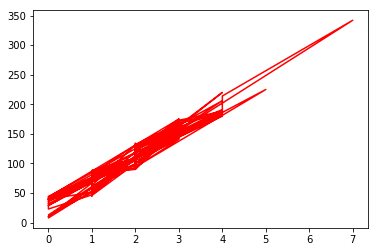

Text(0.5,1,'regrsion')

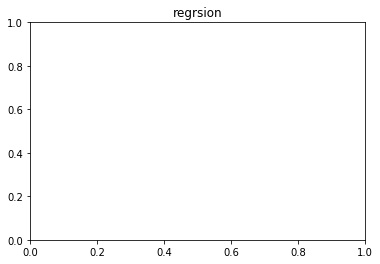

In [34]:
import matplotlib.pyplot as plt 
plt.plot(x['Rolls'],y,color='red')
#plt.scatter(x['Booked Orders Pad Count'],y)
plt.show()
plt.title("regrsion")

In [166]:
predictions = lm.predict(x)
print(y)[0:5]

    Pad_Requiremnt_Count
0               4.000000
1               5.000000
2               6.000000
3               7.000000
4               5.000000
5               5.000000
6               5.000000
7               5.571429
8               5.642857
9               5.714286
10              5.785714
11              5.857143
12              5.928571
13              6.000000
14              6.071429
15              6.142857
16              6.214286
17              6.285714
18              6.357143
19              6.428571
20              6.500000
21              6.571429
22              6.642857
23              6.714286
24              6.785714
25              6.857143
26              6.928571
27              7.000000
28              7.071429
29              7.142857
..                   ...
69             10.000000
70             10.071429
71             10.142857
72             10.214286
73             10.285714
74             10.357143
75             10.428571
76             10.500000


TypeError: 'NoneType' object is not subscriptable

C:\Users\dmereddy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


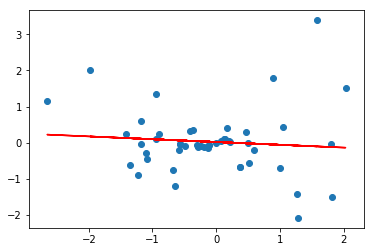

In [21]:
import matplotlib.pyplot as plt
import numpy as np

n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()